In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# adding style sheets for matplotlib and seaborn as ggplots
plt.style.use("ggplot")

In [3]:
df=pd.read_csv("coaster_db.csv")

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.shape

(1087, 56)

In [7]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [11]:
df= df[['coaster_name',  'Location', 'Status', 'Manufacturer', 
    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    'opening_date_clean',
    'speed_mph','height_ft',
    'Inversions_clean','Gforce_clean']].copy()

In [12]:
df.shape

(1087, 13)

In [13]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [14]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [16]:
df['year_introduced'] = pd.to_numeric(df['year_introduced'])

In [18]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [25]:
#Renaming Column

df = df.rename(columns={'coaster_name':'Coaster',
                   'year_introduced':'Started_Year',
                   'Type_Main':'Type',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed(mph)',
                   'height_ft':'Height(feet)',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})
df


,Coaster,Location,Status,Manufacturer,Started_Year,latitude,longitude,Type,Opening_Date,Speed(mph),Height(feet),Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [27]:
df.isna().sum()

Coaster           0
Location          0
Status          213
Manufacturer     59
Started_Year      0
latitude        275
longitude       275
Type              0
Opening_Date    250
Speed(mph)      150
Height(feet)    916
Inversions        0
Gforce          725
dtype: int64

In [28]:
df.loc[df.duplicated()]

,Coaster,Location,Status,Manufacturer,Started_Year,latitude,longitude,Type,Opening_Date,Speed(mph),Height(feet),Inversions,Gforce


In [29]:
df.loc[df.duplicated(subset=['Coaster'])]

,Coaster,Location,Status,Manufacturer,Started_Year,latitude,longitude,Type,Opening_Date,Speed(mph),Height(feet),Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [33]:
#Removing the Duplicate Values
df = df.loc[~df.duplicated(subset=['Coaster','Location','Opening_Date'])].reset_index(drop=True).copy()


In [34]:
df.shape

(990, 13)

In [35]:
df

,Coaster,Location,Status,Manufacturer,Started_Year,latitude,longitude,Type,Opening_Date,Speed(mph),Height(feet),Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [36]:
df['Started_Year'].value_counts()

Started_Year
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Counts')

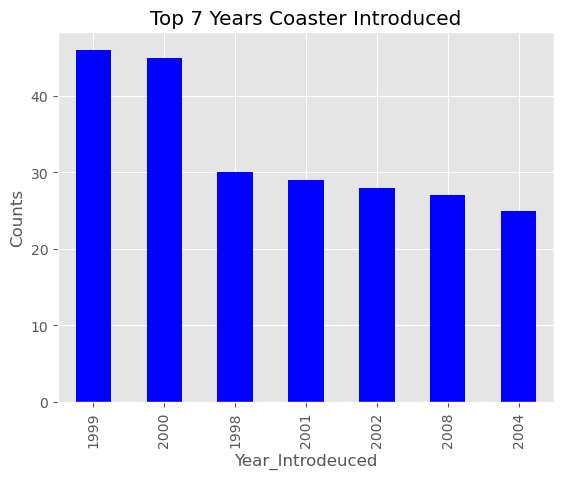

In [45]:
#Bar Graph
ax = df['Started_Year'].value_counts().head(7).plot(kind="bar",title="Top 7 Years Coaster Introduced",color='blue')
ax.set_xlabel("Year_Introdeuced")
ax.set_ylabel("Counts")

Text(0.5, 0, 'Height(Feet)')

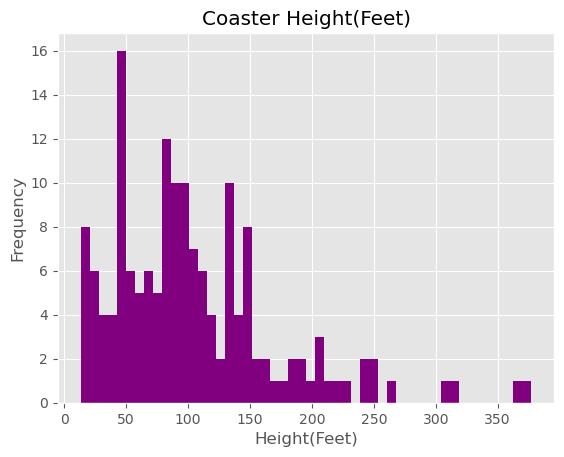

In [58]:
#Histogram

ax = df['Height(feet)'].plot(kind="hist",bins=50,title="Coaster Height(Feet)",color="purple")
ax.set_xlabel("Height(Feet)")

Text(0.5, 0, 'Speed(mph)')

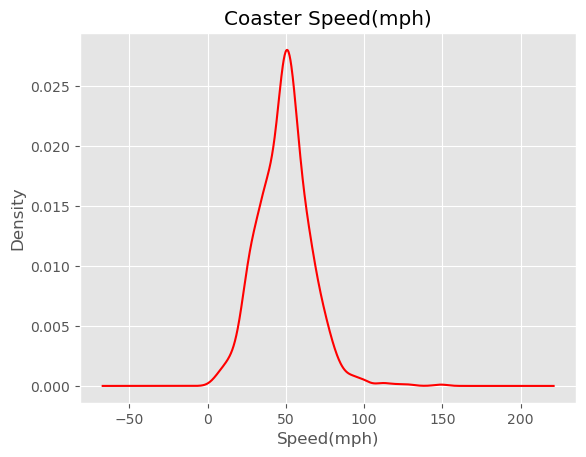

In [59]:
#Line Graph

ax = df['Speed(mph)'].plot(kind="kde",title="Coaster Speed(mph)",color="Red")
ax.set_xlabel("Speed(mph)")

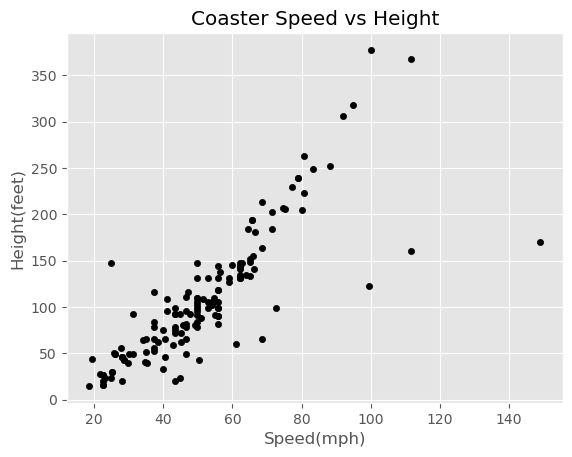

In [63]:
#Scatter Plot

df.plot(kind="scatter",x="Speed(mph)",y="Height(feet)",title= "Coaster Speed vs Height",color="black")
plt.show()

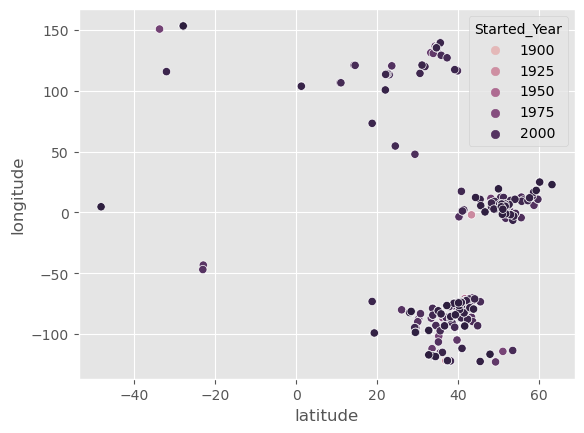

In [72]:
#Using Seaborn 
sns.scatterplot( x='latitude',y='longitude',data=df, 
                   hue='Started_Year')
plt.show()

In [86]:
df_corr = df[['Started_Year','Speed(mph)','Height(feet)','Inversions','Gforce']].dropna().corr() #corr=correlation

<Axes: >

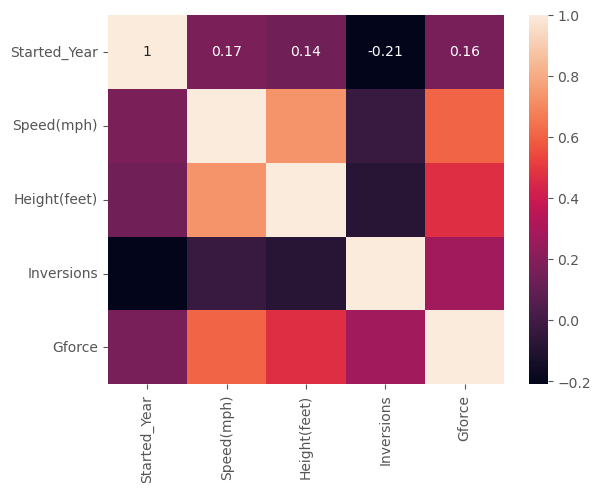

In [134]:
#Heatmap
sns.heatmap(df_corr, annot=True)

In [96]:
#Asking Questions about the data


Text(0.5, 0, 'Average Coaster Speed')

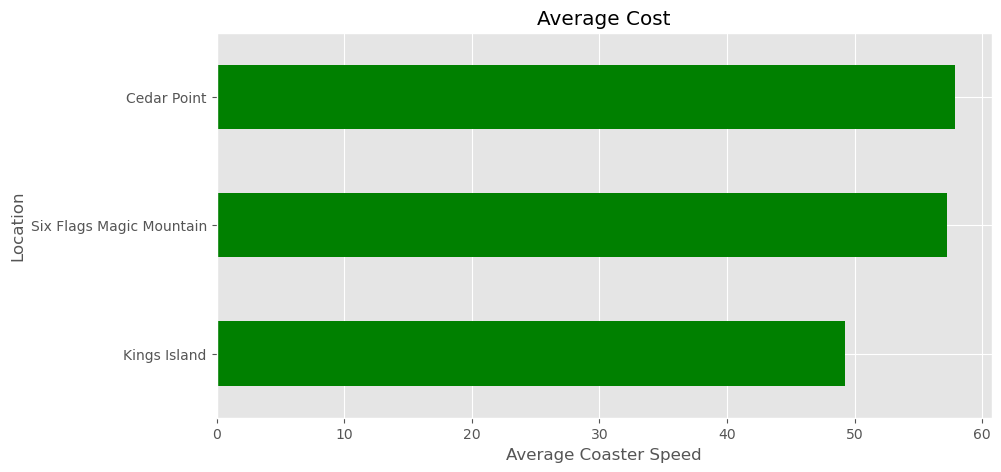

In [131]:
ax = df.query('Location != "Other"').groupby('Location')['Speed(mph)'] .agg(['mean','count']).query('count >=15').sort_values('mean')['mean'].plot(kind="barh",figsize=(10, 5),title="Average Cost",color="green")
ax.set_xlabel("Average Coaster Speed")          